# Projet 2

## Sommaire

► consigne </br>
► setup </br>
► analyse qualitative </br>
► analyse quantative </br>
► évaluation

***
# consigne

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

 - Quels sont les pays avec un fort potentiel de clients pour nos services ?
 - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
 - Dans quels pays l'entreprise doit-elle opérer en priorité ?
Votre mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

*Hello,*

*Les données de la Banque mondiale sont disponibles à l’adresse suivante :*

*https://datacatalog.worldbank.org/dataset/education-statistics*

*Ou en téléchargement direct à ce lien.*

*Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :*

*http://datatopics.worldbank.org/education/*

*Pour la pré-analyse, pourrais-tu :*

 - *Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)*
 - *Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)*
 - *Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)*
 - *Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)*
 
*Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !*

Livrables attendus
 - Un notebook comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).
 - Un support de présentation pour la soutenance.

***
# Setup

### import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import missingno as msno
import ipywidgets as widgets

from datetime import datetime, timezone, timedelta, date
from IPython.display import display as Idisplay
from IPython.display import clear_output
from matplotlib import pylab

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### import des données

In [2]:
EdStatsCountry = pd.read_csv("csv_data/EdStatsCountry.csv")
EdStatsCountry_Series = pd.read_csv("csv_data/EdStatsCountry-Series.csv")
EdStatsData = pd.read_csv("csv_data/EdStatsData.csv")
EdStatsFootNote = pd.read_csv("csv_data/EdStatsFootNote.csv")
EdStatsSeries = pd.read_csv("csv_data/EdStatsSeries.csv")

***
# Analyse Qualitative

premier coup d'oeuil avec une carte des liens entre les tables

![title](table_chart.png)

### affichage des données manquantes sous forme de matrice binaire (Noir = présent, Blanc = manquant)

In [3]:
Tables = [EdStatsCountry, EdStatsCountry_Series, EdStatsData, EdStatsFootNote, EdStatsSeries]
T_Names = ["EdStatsCountry", "EdStatsCountry-Series", "EdStatsData", "EdStatsFootNote", "EdStatsSeries"]
for t,n in zip(Tables, T_Names):
    t.name = n

def draw_missing_values(ds_str, fig, ax):
    t = Tables[T_Names.index(ds_str)]
    msno.matrix(t, ax=ax, sparkline=False)
    ax.set_title(t.name)
    fig.tight_layout(pad=2)

<IPython.core.display.Javascript object>


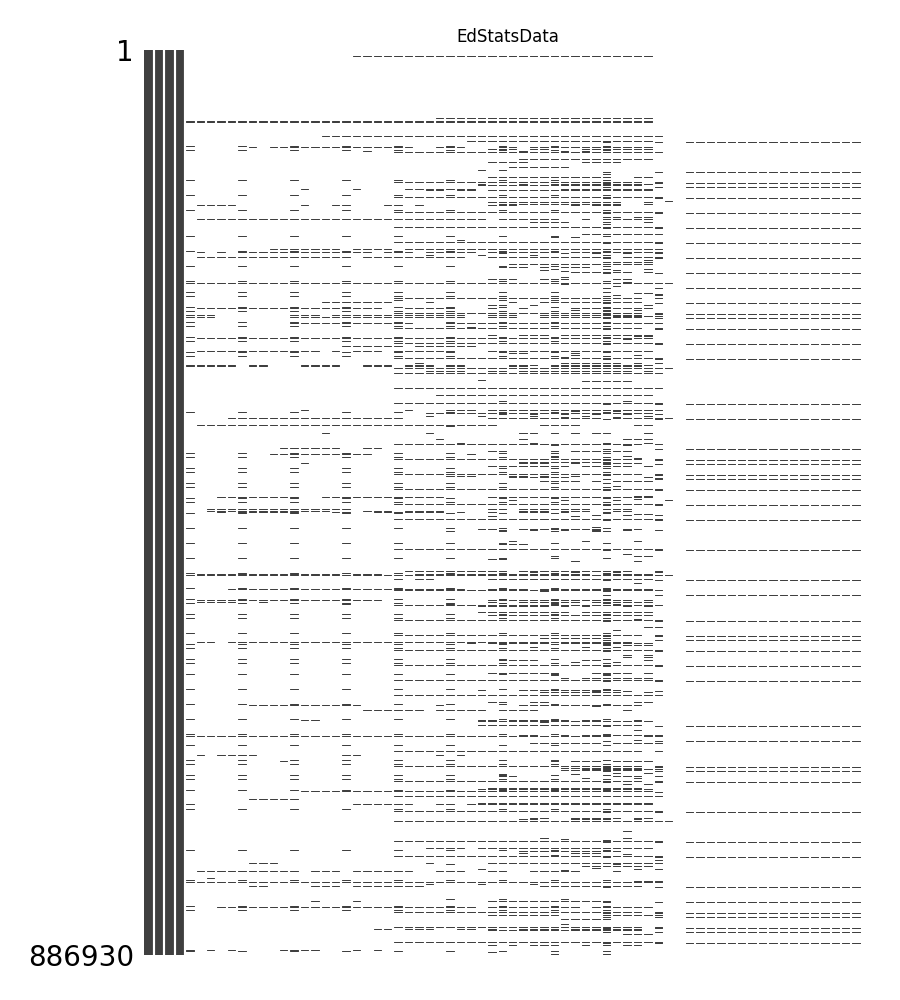

Dropdown(options=('EdStatsCountry', 'EdStatsCountry-Series', 'EdStatsData', 'EdStatsFootNote', 'EdStatsSeries'…

In [4]:
msnowidget = widgets.Dropdown(options=T_Names)

fig, ax = plt.subplots(figsize=(9,10))

def msnowidget_eventhandler(change):
    draw_missing_values(change.new, fig, ax)

msnowidget.observe(msnowidget_eventhandler, names='value')
Idisplay(msnowidget)
draw_missing_values("EdStatsCountry", fig, ax)

***
# Analyse Quantitative

préparation de tableaux utiles pour l'affichage

In [5]:
indicators = EdStatsSeries["Indicator Name"].to_numpy()
regions =  ['Arab World',
            'East Asia & Pacific',
            'East Asia & Pacific (all income levels)',
            'East Asia & Pacific (excluding high income)',
            'Europe & Central Asia',
            'Europe & Central Asia (all income levels)',
            'Europe & Central Asia (excluding high income)',
            'Euro area',
            'European Union',
            'Heavily indebted poor countries (HIPC)',
            'High income',
            'Latin America & Caribbean',
            'Latin America & Caribbean (all income levels)',
            'Latin America & Caribbean (excluding high income)',
            'Least developed countries: UN classification',
            'Low income',
            'Lower middle income',
            'Low & middle income',
            'Middle East & North Africa',
            'Middle East & North Africa (all income levels)',
            'Middle East & North Africa (excluding high income)',
            'Middle income',
            'North America',
            'OECD members',
            'South Asia',
            'Sub-Saharan Africa',
            'Sub-Saharan Africa (all income levels)',
            'Sub-Saharan Africa (excluding high income)',
            'Upper middle income',
            'World']
countries = EdStatsCountry["Table Name"].to_numpy()

Dates = [date(year, 1, 1) for year in list(range(1970,2018,1))+list(range(2020,2101,5))]
Dates_string = [str(d.year) for d in Dates]

préparation de fonctions pour l'extraction des données depuis les datasets

In [6]:
def get_Y_values(dataframe, indicator:str, country:str):
    Q = EdStatsData.query("`Indicator Name` == @indicator & `Country Name` == @country")
    return Q[Dates_string].to_numpy().ravel()
    
def get_indi_missing(dataframe, indicator:str, country:str):
    Q = EdStatsData.query("`Indicator Name` == @indicator")
    return Q[Dates_string].isna().mean(axis=1).to_numpy(), Q.isna().mean(axis=0)[Dates_string].to_numpy(), Q.reset_index().query("`Country Name`== @country").index[0]

def get_cty_missing(dataframe, indicator:str, country:str):
    Q = EdStatsData.query("`Country Name` == @country")
    return Q[Dates_string].isna().mean(axis=1).to_numpy(), Q.isna().mean(axis=0)[Dates_string].to_numpy(), Q.reset_index().query("`Indicator Name` == @indicator").index[0]

def get_indi_by_cty(dataframe, indicator:str):
    Q = EdStatsData.query("`Indicator Name` == @indicator")
    return Q[Dates_string].to_numpy()

création de widgets pour l'affichage dynamique

In [7]:
options = [(d.strftime('%Y'), d) for d in Dates]
date_slider = widgets.SelectionRangeSlider(options=options,
                                           index=(0,55),
                                           description='Période',
                                           disabled=False)

indicators_combobox = widgets.Combobox(
    value='Population, total',
    placeholder='',
    options=list(indicators),
    description='Indicator',
    ensure_option=True,
    disabled=False
)

countries_combobox = widgets.Combobox(
    value='France',
    placeholder='',
    options=list(countries),
    description='Country',
    ensure_option=True,
    disabled=False
)

creation de l'objet qui gère l'affichage dynamique

In [8]:
class Displayer :
    
    def __init__(self, DS, code, country):
        self.dataset = DS
        self.code = code
        self.country = country
        self.X = np.array(Dates)
        self.d_start = min(self.X)
        self.d_end = max(self.X)
        self.mask = np.full(len(self.X), True)
        self.fig, self.ax = None, None
        self.fig1, self.ax1 = None, None
        self.fig2, self.ax2 = None, None
        self.out = widgets.Output()
        self.indi_miss = widgets.Output()
        self.cty_miss = widgets.Output()
    
    def change_dates(self, new_date_start, new_date_end):
        self.d_start = new_date_start
        self.d_end = new_date_end
        self._UPDATE_MASK()
    
    def change_country(self, new_country):
        self.country = new_country
    
    def change_code(self, new_code):
        self.code = new_code
    
    def _UPDATE_MASK(self):
        self.mask = np.array([self.d_start <= date <= self.d_end for date in self.X])
    
    def _plot(self):
        self.out.clear_output()
        with self.out :
            if self.fig==None :
                self.fig, self.ax = plt.subplots(figsize=(9,6), 
                                                 num=f"{self.country}-{self.code}")
            else :
                self.fig.set(label = f"{self.country}-{self.code}")
            fig, ax = self.fig, self.ax
            ax.clear()
            ax.plot(self.X[self.mask], 
                    get_Y_values(self.dataset, self.code, self.country)[self.mask],
                    zorder=1)

            ax.grid(zorder=0)
            fig.tight_layout()
            Idisplay(fig)
    
    def _indicator_missing(self):
        self.indi_miss.clear_output()
        with self.indi_miss :
            if self.fig1==None :
                self.fig1, self.ax1 = plt.subplots(3, 1, 
                                                   figsize=(9,35), 
                                                   height_ratios = [15,10,5], 
                                                   num=f"{self.code[:50]}")
            else :
                self.fig1.set(label = f"{self.code[:50]}")
            fig1, ax1 = self.fig1, self.ax1
            miss_tab, miss_date, cty_index = get_indi_missing(self.dataset, self.code, self.country)
            N = len(miss_tab)
            
            ax1[0].clear()
            bars = ax1[0].barh(range(N), miss_tab/max(miss_tab))
            bars[cty_index].set_color('r')
            ax1[0].set_title(f'valeurs manquantes par pays')
            ax1[0].set_yticks([])
            ax1[0].set_ylim(-1, N+1)
            
            ax1[1].clear()
            bars = ax1[1].barh(range(len(miss_date)), miss_date/max(miss_date))
            ax1[1].set_title(f'valeurs manquantes par année')
            ax1[1].set_ylim(-1, len(miss_date)+1)
            ax1[1].set_yticks(np.arange(len(Dates_string)), Dates_string)
            
            ax1[2].clear()
            ax1[2].pie([miss_tab.mean(), 1-miss_tab.mean()], 
                        labels=['missing', 'data'],
                        autopct='%1.1f%%')
            ax1[2].set_title(f'valeurs manquantes par pays -moyenne-')
            ax1[2].axis('equal')
            
            fig1.tight_layout()
            Idisplay(fig1)
    
    def _country_missing(self):
        self.cty_miss.clear_output()
        with self.cty_miss :
            if self.fig2==None :
                self.fig2, self.ax2 = plt.subplots(3, 1,
                                                   figsize=(9,115), 
                                                   height_ratios = [100,10,5],
                                                   num=f"{self.country}")
            else :
                self.fig2.set(label = f"{self.country}")
            fig2, ax2 = self.fig2, self.ax2
            miss_tab, miss_date, indi_index = get_cty_missing(self.dataset, self.code, self.country)
            N = len(miss_tab)
            
            ax2[0].clear()
            bars = ax2[0].barh(range(N), miss_tab/max(miss_tab))
            bars[indi_index].set_color('r')
            ax2[0].set_title(f'valeurs manquantes par indicateur')
            ax2[0].set_yticks([])
            ax2[0].set_ylim(-1, N+1)
            
            ax2[1].clear()
            bars = ax2[1].barh(range(len(miss_date)), miss_date/max(miss_date))
            ax2[1].set_title(f'valeurs manquantes par année')
            ax2[1].set_ylim(-1, len(miss_date)+1)
            ax2[1].set_yticks(np.arange(len(Dates_string)), Dates_string)
            
            ax2[2].clear()
            ax2[2].pie([miss_tab.mean(), 1-miss_tab.mean()], 
                        labels=['manquant', 'donnees'],
                        autopct='%1.1f%%')
            ax2[2].set_title(f'valeurs manquantes par indicateur -moyenne-')
            ax2[2].axis('equal')
            
            fig2.tight_layout()
            Idisplay(fig2)
    
    def display(self):
        self._plot()
        self._indicator_missing()
        self._country_missing()

mise en relation de l'objet qui gère l'affichage et des widgets qui récupèrent les données

In [9]:
Data_displayer = Displayer(EdStatsData, "Population, total", "France")

def date_slider_eventhandler(change):
    Data_displayer.change_dates(*change.new)
    Data_displayer.display()
def indicators_combobox_eventhandler(change):
    Data_displayer.change_code(change.new)
    Data_displayer.display()
def countries_combobox_eventhandler(change):
    Data_displayer.change_country(change.new)
    Data_displayer.display()

date_slider.observe(date_slider_eventhandler, names='value')
indicators_combobox.observe(indicators_combobox_eventhandler, names='value')
countries_combobox.observe(countries_combobox_eventhandler, names='value')

In [10]:
tab = widgets.Tab()
tab.children = [widgets.VBox([Data_displayer.out, date_slider, indicators_combobox, countries_combobox]), 
                widgets.VBox([Data_displayer.indi_miss, indicators_combobox]),
                widgets.VBox([Data_displayer.cty_miss, countries_combobox])]
tab.titles = ("plot", "indicator", "country")
Idisplay(tab)
Data_displayer.display()
print("")

***
# Evaluation

### selection de la periode d'analyse

on se concentre sur la partie entre 2005 et 2015 car c'est une période à la fois suffisamment récente et les années autour de 2010 sont les plus renseignées au niveau des indicateurs.

<IPython.core.display.Javascript object>


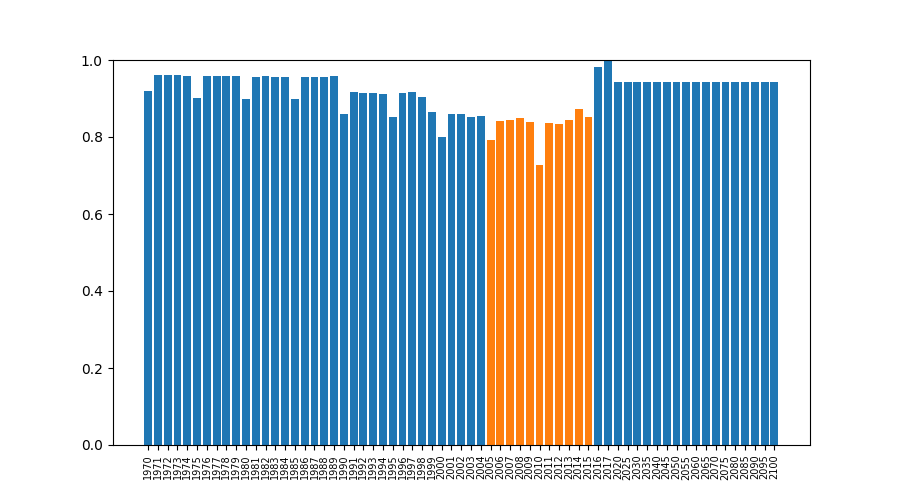

In [11]:
fig4, ax4 = plt.subplots(figsize=(9,5))

ax4.bar(np.arange(65), 
        np.isnan(np.array(EdStatsData.to_numpy()[:,4:-1], dtype=float)).mean(axis=0), 
        color=['C00']*35+['C01']*11+['C00']*20)
ax4.set_xticks(np.arange(65), labels=Dates_string, rotation=90, fontsize=7)
ax4.set_ylim(0,1)
fig4.set(label='Données manquantes par année')
print()

## repérage des indicateurs

In [12]:
def stats_indicator(indi):
    Q = EdStatsData.query("`Indicator Name` == @indi")
    return pd.DataFrame(Q[~Q["Country Name"].isin(regions)][Dates_string].to_numpy().ravel()).dropna().round(5).describe()

### communication

#### Internet users (per 100 people)

In [13]:
EdStatsSeries.query("`Indicator Name` == 'Internet users (per 100 people)'")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Please cite the International Telecommunicatio...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
stats_indicator('Internet users (per 100 people)')

,0
count,4832.000
mean,21.274
std,26.834
min,0.000
25%,0.500
50%,7.000
75%,36.325
max,98.324


#### Personal computers (per 100 people)

In [15]:
EdStatsSeries.query("`Indicator Name` == 'Personal computers (per 100 people)'")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),NaN,Personal computers are self-contained computer...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,Restricted use: Please cite the International ...,"International Telecommunication Union, World T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
stats_indicator('Personal computers (per 100 people)')

,0
count,2390.000
mean,10.039
std,15.817
min,0.000
25%,0.727
50%,3.438
75%,11.932
max,96.171


### education

Les valeurs éducatives doivent êtres pondérées par la population pour donner des résultats exploitables

In [17]:
def get_weighted(DS, indi):
    A = DS.copy()
    A.sort_values("Country Name", 0)
    Pop = A.query("`Indicator Name` == 'Population, total'")
    Indi = A.query("`Indicator Name` == @indi")
    Pop.index = Indi.index = pd.Index(range(len(DS), len(DS)+len(Pop)))
    Indi[Dates_string] = Indi[Dates_string].div(Pop[Dates_string])
    Indi["Indicator Name"] = Indi["Indicator Name"] + " weighted by population"
    return Indi

#### Enrolment in primary education, both sexes (number)

In [18]:
EdStatsSeries.query("`Indicator Name` == 'Enrolment in primary education, both sexes (number)'")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2246,SE.PRM.ENRL,Primary,"Enrolment in primary education, both sexes (nu...",NaN,Total number of students enrolled in public an...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
stats_indicator('Enrolment in primary education, both sexes (number)')

,0
count,7369.000
mean,3248954.905
std,12615284.041
min,1008.000
25%,116756.000
50%,504226.000
75%,2200335.000
max,150940992.000


In [20]:
EdStatsData = pd.concat((EdStatsData, get_weighted(EdStatsData, 'Enrolment in primary education, both sexes (number)')))

Maximum : 0.2531978696990211 Uganda 2009

#### Enrolment in secondary education, both sexes (number)

In [21]:
EdStatsSeries.query("`Indicator Name` == 'Enrolment in secondary education, both sexes (number)'")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2294,SE.SEC.ENRL,Secondary,"Enrolment in secondary education, both sexes (...",NaN,Total number of students enrolled at public an...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
stats_indicator('Enrolment in secondary education, both sexes (number)')

,0
count,6274.000
mean,2219783.735
std,8482689.711
min,0.000
25%,52523.750
50%,342377.500
75%,1156794.250
max,129542056.000


In [23]:
EdStatsData = pd.concat((EdStatsData, get_weighted(EdStatsData, 'Enrolment in secondary education, both sexes (number)')))

Maximum : 0.20126769717825674 West Bank and Gaza 2006

#### Enrolment in tertiary education, all programmes, both sexes (number)

In [24]:
EdStatsSeries.query("`Indicator Name` == 'Enrolment in tertiary education, all programmes, both sexes (number)'")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2332,SE.TER.ENRL,Tertiary,"Enrolment in tertiary education, all programme...",NaN,The total number of students enrolled at publi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
stats_indicator('Enrolment in tertiary education, all programmes, both sexes (number)')

,0
count,5475.000
mean,679321.702
std,2399902.569
min,0.000
25%,10235.500
50%,98122.000
75%,337453.500
max,43367392.000


In [26]:
EdStatsData = pd.concat((EdStatsData, get_weighted(EdStatsData, 'Enrolment in tertiary education, all programmes, both sexes (number)')))

Maximum : 0.08729190749860695 Cuba 2008

### economics

#### Income Group

In [150]:
income_groups = pd.unique(EdStatsCountry["Income Group"].dropna())
income_int = [3, 0, 2, 1, 4]

def income_cat(x):
    if x!=x :
        return x
    else :
        return income_int[list(income_groups).index(x)]

# ces catégories sont numérotées de 0 à 4 classées par ordre croissant
# Low income < Lower middle income < Upper middle income < High income: nonOECD < High income: OECD

In [158]:
pd.DataFrame(EdStatsCountry["Income Group"].value_counts())

,Income Group
Upper middle income,55
Lower middle income,50
High income: nonOECD,44
Low income,34
High income: OECD,31


#### GNI per capita, Atlas method (current US$)

In [29]:
EdStatsSeries.query("`Indicator Name` == 'GNI per capita, Atlas method (current US$)'")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
1668,NY.GNP.PCAP.CD,Economic Policy & Debt: National accounts: Atl...,"GNI per capita, Atlas method (current US$)",NaN,GNI per capita (formerly GNP per capita) is th...,NaN,Annual,NaN,NaN,Weighted average,...,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
stats_indicator('GNI per capita, Atlas method (current US$)')

,0
count,7356.000
mean,7974.770
std,14512.733
min,60.000
25%,620.000
50%,2210.000
75%,8000.000
max,186080.000


Maximum : 186080.0 Monaco 2008

# notation

création des fonctions de calcul de notes

In [142]:
selection =[('Internet users (per 100 people)', 0, 100),
            ('Personal computers (per 100 people)', 0, 100),
            ('Income Group', 0, 4),
            ('GNI per capita, Atlas method (current US$)', 0, 186080.0),
            ('Enrolment in primary education, both sexes (number) weighted by population', 0, 0.2531978696990211),
            ('Enrolment in secondary education, both sexes (number) weighted by population', 0, 0.20126769717825674),
            ('Enrolment in tertiary education, all programmes, both sexes (number) weighted by population', 0, 0.08729190749860695)]

Mindex = [('communication', 'Internet users (per 100 people)'),
          ('communication', 'Personal computers (per 100 people)'),
          ('economics',     'Income Group'),
          ('economics',     'GNI per capita, Atlas method (current US$)'),
          ('education',     'Enrolment in primary education, both sexes (number) weighted by population'),
          ('education',     'Enrolment in secondary education, both sexes (number) weighted by population'),
          ('education',     'Enrolment in tertiary education, all programmes, both sexes (number) weighted by population'),
          ('divers',        'moyenne generale')]

In [152]:
def list_normalise(L, m, M):
    L = L[~np.isnan(L)]
    return (L-m)/(M-m)

def point_normalise(p, m, M):
    return (p-m)/(M-m)

def note_indicateur(country, indicator, m=0, M=1):
    if indicator != 'Income Group': 
        Y = get_Y_values(EdStatsData, indicator, country)
        return list_normalise(Y[35:46], m, M).mean()
    else :
        Y=EdStatsCountry.query("`Table Name`==@country")
        return point_normalise(income_cat(Y["Income Group"].iloc[0]), m, M)

def note(country, PB=None):
    if PB :
        PB.value = PB.value+1
    
    bull_index = pd.MultiIndex.from_tuples(Mindex, names=["categorie", "indicateur"])
    V = [round(20*note_indicateur(country, *s), 2) for s in selection]
    res = pd.DataFrame(V+[sum(V)/len(V)], 
                       index=bull_index, 
                       columns=["note"],
                       dtype=float)
    res.columns.name = country
    return res

affichage du bulletin de notes pour un pays

In [153]:
bulletin = note('France')

note_out = widgets.Output()
with note_out :
    Idisplay(bulletin)

countries_combobox = widgets.Combobox(
    value='France',
    placeholder='',
    options=list(countries),
    description='Country',
    ensure_option=True,
    disabled=False
)

def countries_combobox_eventhandler(change):
    bulletin = note(change.new)
    note_out.clear_output()
    with note_out :
        Idisplay(bulletin)

countries_combobox.observe(countries_combobox_eventhandler, names='value')

Idisplay(countries_combobox, note_out)

Combobox(value='France', description='Country', ensure_option=True, options=('Aruba', 'Afghanistan', 'Angola',…

Output()

Calcul de la note pour chaque pays

In [154]:
progressBar = widgets.IntProgress(value=0,
                                  min=0,
                                  max=len(countries),
                                  description='Chargement:',
                                  bar_style='',
                                  style={'bar_color': 'blue'},
                                  orientation='horizontal')

Idisplay(progressBar)

EdStatsCountry["Note"]=EdStatsCountry["Table Name"].apply(lambda x:note(x, progressBar).loc["divers", "moyenne generale"])

IntProgress(value=0, description='Chargement:', max=241, style=ProgressStyle(bar_color='blue'))

Affichage des 10 pays les mieux notés

In [155]:
EdStatsCountry.sort_values(["Note", "Table Name"], ascending=[False, True]).reset_index()[["Table Name", "Note"]].head(10)

,Table Name,Note
0,Norway,12.339
1,Netherlands,12.166
2,Iceland,12.156
3,Sweden,12.151
4,United States,11.997
5,Denmark,11.913
6,Switzerland,11.771
7,New Zealand,11.551
8,United Kingdom,11.443
9,Finland,11.263
